<a href="https://colab.research.google.com/github/soyongseok/-/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from preamble import *
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    Xm, ym, stratify=ym, random_state=42)

cancer = load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

ModuleNotFoundError: ignored

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(LogisticRegression(solver='liblinear'), n_estimators=100,
                            oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xc_train, yc_train)

BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear'),
                  n_estimators=100, n_jobs=-1, oob_score=True, random_state=42)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print('훈련 세트 정확도: {:.3f}'.format(bagging.score(Xc_train, yc_train)))
print('테스트 세트 정확도: {:.3f}'.format(bagging.score(Xc_test, yc_test)))
print('OOB 샘플의 정확도: {:.3f}'.format(bagging.oob_score_))

ValueError: ignored

In [ ]:
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5,
                            n_jobs=-1, random_state=42)
bagging.fit(Xm_train, ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5,
                  n_jobs=-1, random_state=42)

In [ ]:
import matplotlib.pyplot as plt
import scikit
plt.rc('font', family='NanumBarunGothic') 

ModuleNotFoundError: ignored

AttributeError: ignored

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48176 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44613 missing from current font.
  font.set_text

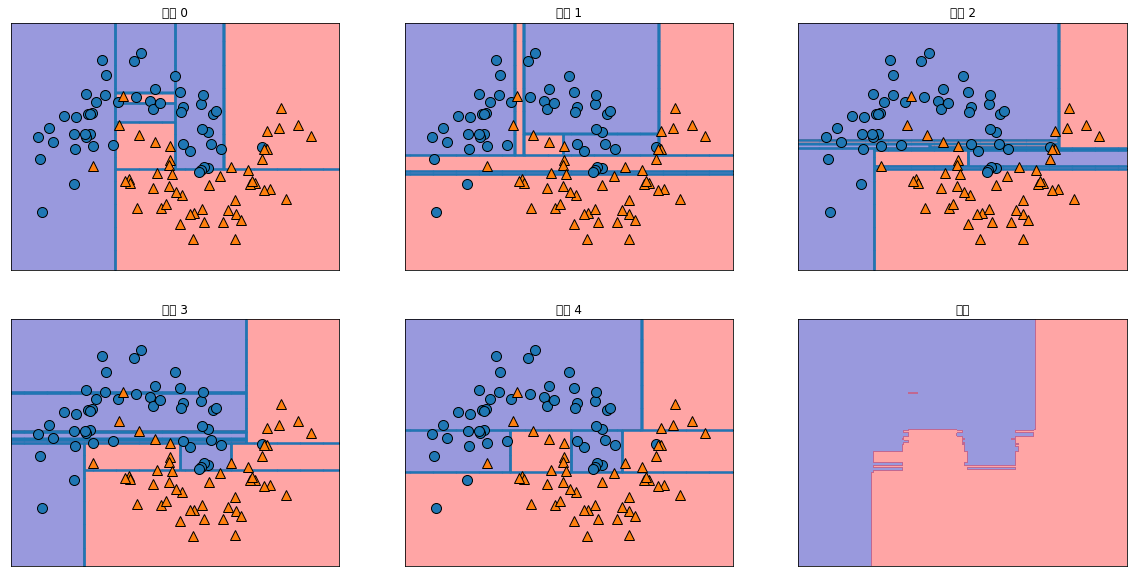

In [ ]:
fig, axes = plt.subplots(2 ,3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title('트리 {}'.format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)

mglearn.plots.plot_2d_separator(bagging, Xm, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1, -1].set_title('배깅')
mglearn.discerte_scatter(Xm[:,0], Xm[:, 1], ym)
plt.show()

In [ ]:
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100,
                            oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xc_train, yc_train)

print('훈련 세트 정확도: {:.3f}'.format(bagging.score(Xc_train, yc_train)))
print('테스트 세트 정확도: {:.3f}'.format(bagging.score(Xc_test, yc_test)))
print('OOB 샘플의 정확도: {:.3f}'.format(bagging.oob_score_))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965
OOB 샘플의 정확도: 0.948


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
xtree = ExtraTreesClassifier(n_estimators=5, n_jobs=-1, random_state=0)
xtree.fit(Xm_train, ym_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), xtree.estimaotors_)):
  ax.set_tilte('트리 {}'.format(i))
  mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)

mglearn.plots.plot_2d_separator(xtree, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('엑스트라 트리')
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

NameError: ignored

In [ ]:
xtree = ExtraTreesCalssifier(n_estimators=100, n_jobs=-1, random_state=0)
xtree.fit(Xc_train, yc_train)

print('훈련 세트 정확도: {:.3f}'.format(xtree.score(Xc_train, yc_train)))
print('테스트 세트 정확도: {:.3f}'.format(xtree.score(Xc_test, yc_test)))

NameError: ignored

In [ ]:
n_feature = cancer.data.shape[1]
plt.barh(range(n_features), xtree.feature_importances_, align='center')
plt.yticks(np.arrange(n_features), cancer.n_feature_names)
plt.xlabel('특성 중요도')
plt.ylabel('특성')
plt.ylim(-1, n_features)
plt.show()

NameError: ignored

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaboostClassifier(n_estimator=5, random_state=42)
ada.fit(Xm_train, ym_train)

fig,axes = plt.subplots(2,3, figsize=(20, 10))
for i, (ax,tree) in enumerate(zip(axes.ravel(), ada.estimators_)):
    ax.set_title('트리 {}'.format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)

mglearn.plots.plot_2d_separator(ada, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('에이다부스트')
mglearn.discrete_scatter(Xm[:, 0], Xm[:,1], ym)
plt.show()

NameError: ignored

In [ ]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(Xc_train, yc_train)

print('훈련 세트 정확도: {:.3f}'.format(ada.score(Xc_train, yc_train)))
print('테스트 세트 정확도: {:.3f}'.format(ada.score(Xc_test, yc_test)))

NameError: ignored